In [1]:
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from matplotlib import cm
import networkx as nx
import powerlaw
import pandas as pd
import random
import math

# 데이터 불러오기

In [2]:
from matplotlib import font_manager, rc
# 한글 폰트가 깨지지 않기 위한 세팅
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
file_lst = ['Sci36','Sci79','IntSci10','PHYS','CM','EM+QM']

# 이분 네트워크

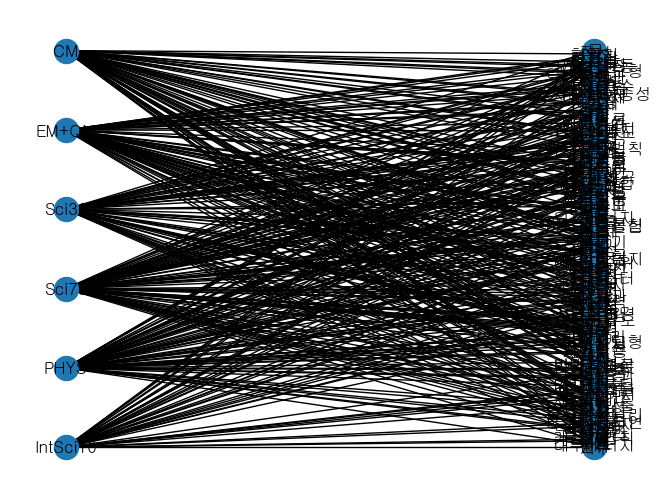

In [7]:
B = nx.Graph()

for file_name in file_lst:
    f = open(f"NewPhy_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        B.add_node(file_name, bipartite=1)
        # 노드 i 추가
        for i in data_line:
            if B.has_edge(i, file_name):
                continue
            else:
                B.add_node(i, bipartite=0)
                B.add_edge(i, file_name, weight=1)

bottom_nodes, top_nodes = bipartite.sets(B)
                
pos = nx.bipartite_layout(B, bottom_nodes)
nx.draw(B, pos=pos, with_labels=True, font_family = font)

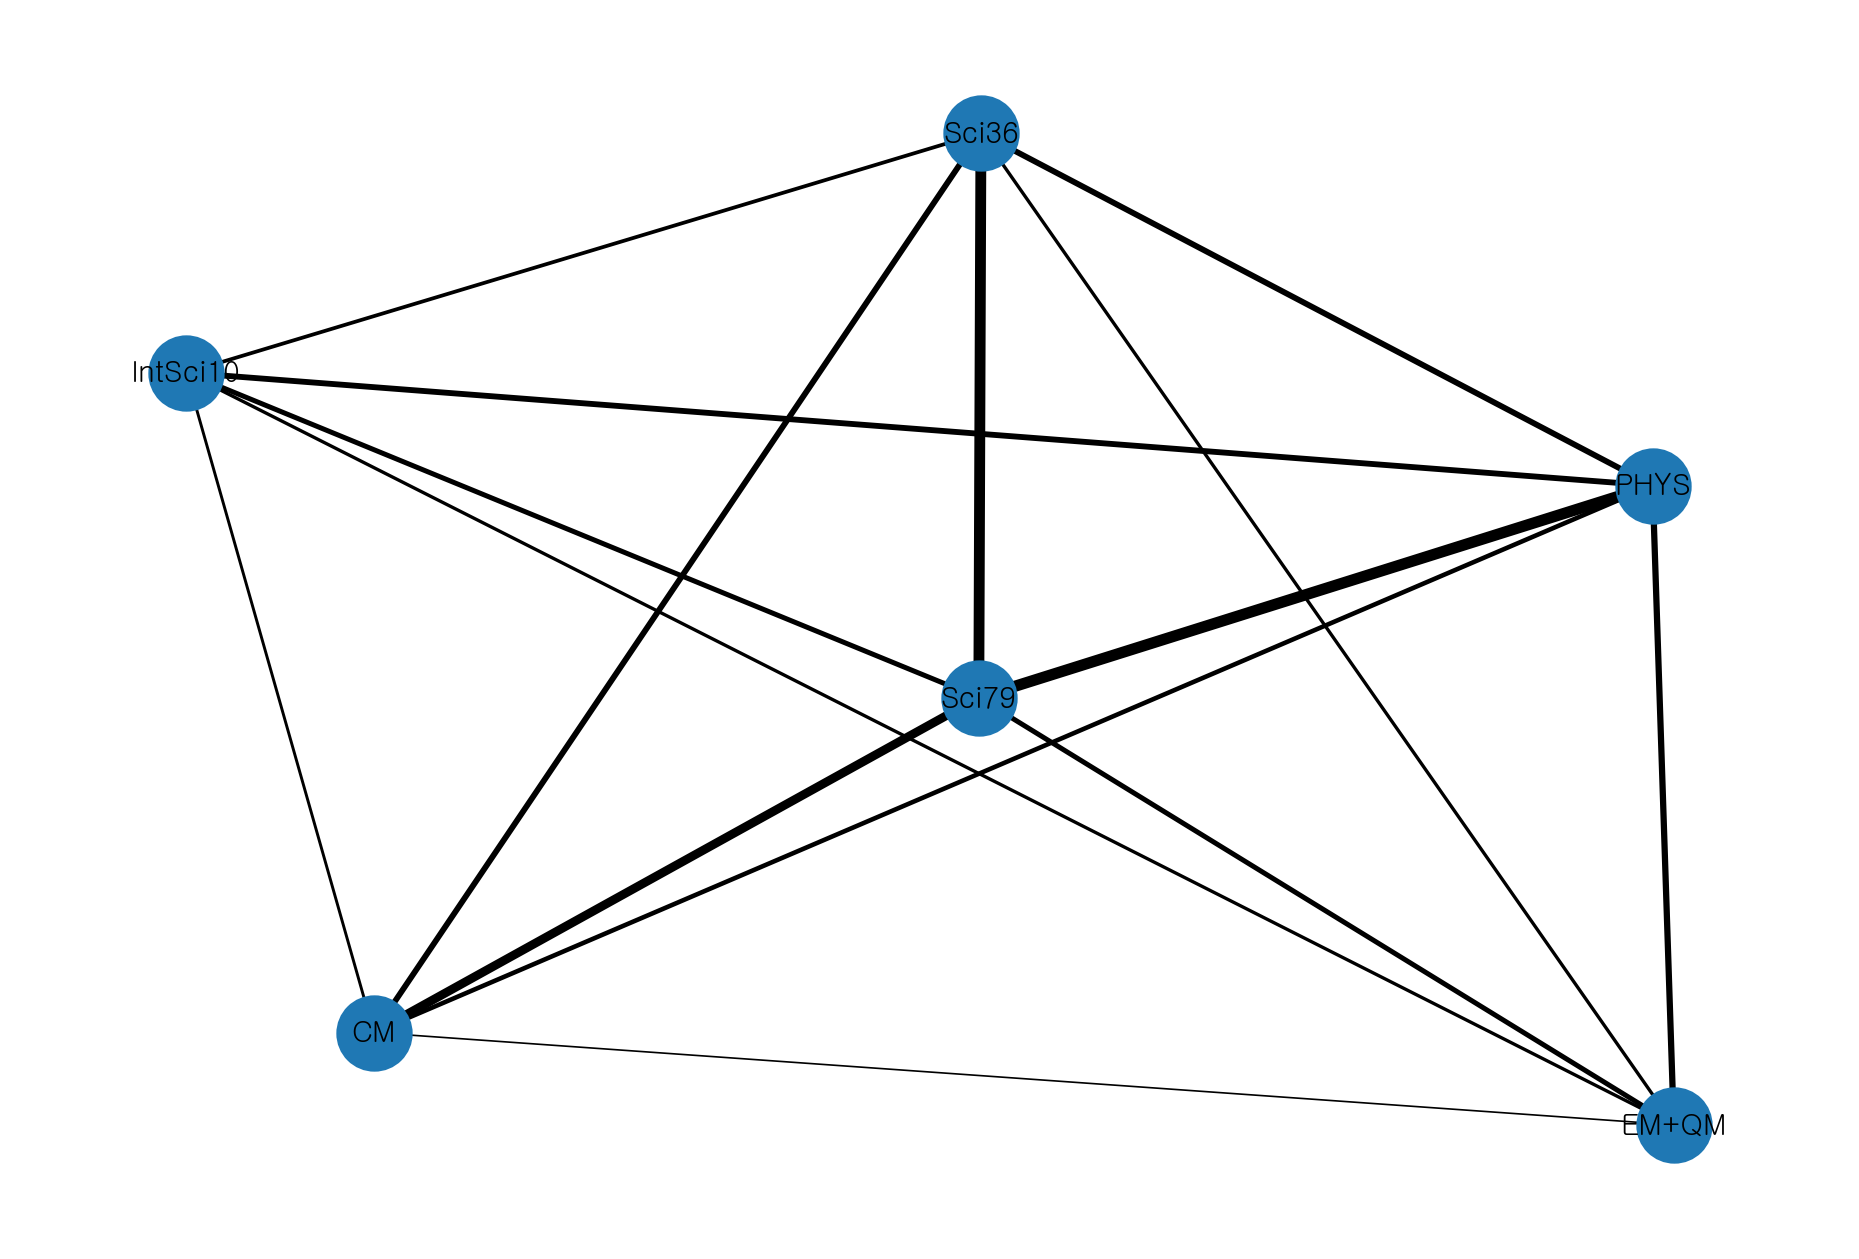

In [8]:
G = bipartite.weighted_projected_graph(B, bottom_nodes)

# 노드와 엣지의 가중치를 저장할 딕셔너리 초기화
edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}

# 노드의 크기 및 엣지의 굵기를 가중치에 비례하여 설정
edge_width = [edge_weights[edge] * 0.1 for edge in G.edges()]

# 그래프 그리기
plt.figure(figsize=(6,4), dpi=300)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, width=edge_width,
        font_family = font, font_size=7)
plt.show()

In [10]:
def graph_RB(B, p):
    """
    상위 random-walk betweenness 값을 가지는 에지를 추출하는 함수
    B = 이분 네트워크
    p = (특정 값 기준) 상위 에지 개수
    """
    idx = p-1

    G = bipartite.weighted_projected_graph(B, bottom_nodes)

    edge_betweenness = nx.edge_current_flow_betweenness_centrality(G, weight='weight')
    
    # 중요한 엣지 추출 
    threshold = sorted(edge_betweenness.values(), reverse=True)[idx]

    important_edges = [(u, v) for (u, v), bc in edge_betweenness.items() if bc >= threshold]

    # 중요한 엣지들만 포함하는 서브그래프 생성
    G = G.edge_subgraph(important_edges).copy()

    # 노드와 엣지의 가중치를 저장할 딕셔너리 초기화
    for edge in important_edges:
        G[edge[0]][edge[1]]['weight'] = edge_betweenness[edge]

    # 노드의 크기 및 엣지의 굵기를 가중치에 비례하여 설정
    edges = G.edges(data=True)
    weights = [edge[2]['weight'] for edge in edges]
    
    return G, weights

In [11]:
def graph_DB(B, p):
    """
    상위 edge weight 값을 가지는 에지를 추출하는 함수
    B = 이분 네트워크
    p = (특정 값 기준) 상위 에지 개수
    """
    idx = p-1

    G = bipartite.weighted_projected_graph(B, bottom_nodes)

    edge_betweenness = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}

    # 중요한 엣지 추출
    threshold = sorted(edge_betweenness.values(), reverse=True)[idx]

    important_edges = [(u, v) for (u, v), bc in edge_betweenness.items() if bc >= threshold]
    
    # 중요한 엣지들만 포함하는 서브그래프 생성
    G = G.edge_subgraph(important_edges).copy()

    # 노드와 엣지의 가중치를 저장할 딕셔너리 초기화
    edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}

    # 노드의 크기 및 엣지의 굵기를 가중치에 비례하여 설정
    edges = G.edges(data=True)
    weights = [edge[2]['weight'] for edge in edges]
    
    return G, weights

# 최종 그림

In [12]:
# 노드 위치
nodes_position = {
    'Sci36': [0.5, 0.87],'Sci79':[1.0, 0.0],
    'IntSci10':[0.5, -0.87],'PHYS':[-0.5, -0.87],
    'CM':[-1.0, 0.0],'EM+QM':[-0.5, 0.87]
}

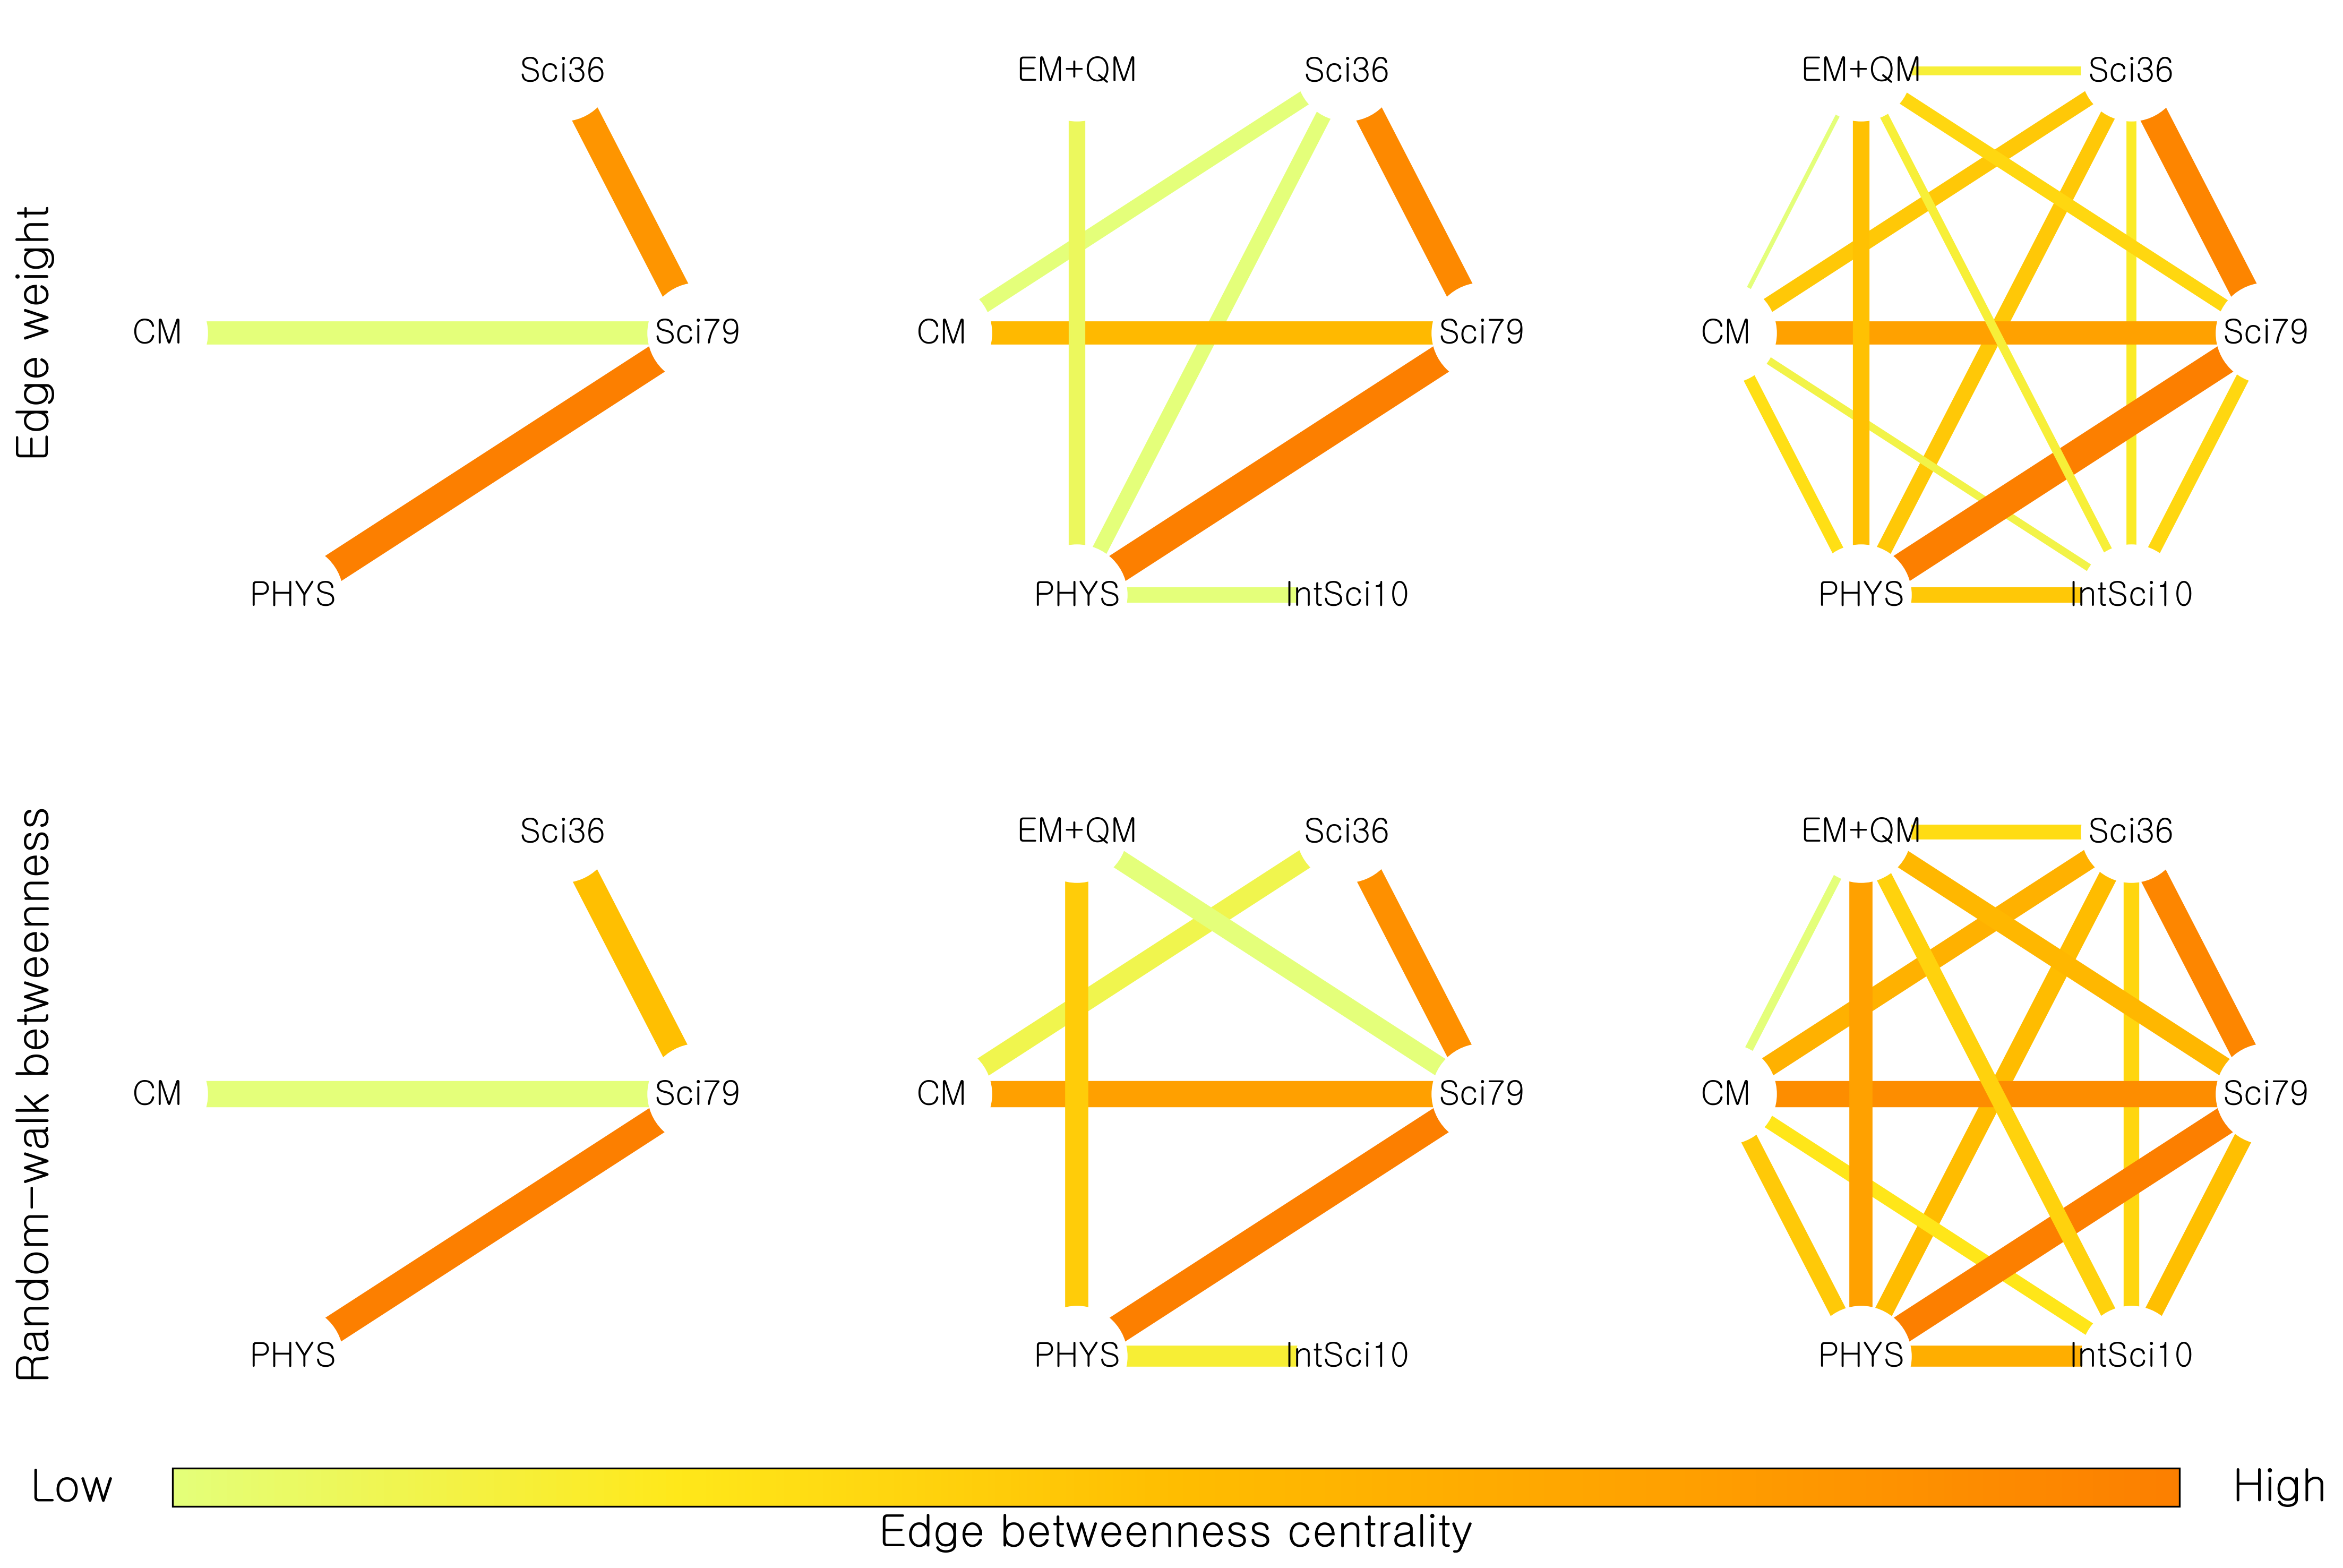

In [13]:
plt.figure(figsize=(18, 12), dpi=300)

# Edge weight
p = 3
G, weights = graph_DB(B, p)
plt.subplot(231)
edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}
edge_width = [edge_weights[edge] * 0.5 for edge in G.edges()]
nx.draw(G, nodes_position, node_color='w', node_size=2000, width=edge_width, edge_color=weights, edge_cmap=plt.cm.Wistia, with_labels=True, font_family = font, font_size=15)
plt.text(-0.1, 0.5, 'Edge weight', va='center', ha='center', rotation='vertical', fontsize=20, transform=plt.gca().transAxes)

p = 7
G, weights = graph_DB(B, p)
plt.subplot(232)
edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}
edge_width = [edge_weights[edge] * 0.5 for edge in G.edges()]
nx.draw(G, nodes_position, node_color='w', node_size=2000, width=edge_width, edge_color=weights, edge_cmap=plt.cm.Wistia, with_labels=True, font_family = font, font_size=15)

p = 15
G, weights = graph_DB(B, p)
plt.subplot(233)
edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}
edge_width = [edge_weights[edge] * 0.5 for edge in G.edges()]
nx.draw(G, nodes_position, node_color='w', node_size=2000, width=edge_width, edge_color=weights, edge_cmap=plt.cm.Wistia, with_labels=True, font_family = font, font_size=15)

# Random-walk betweenness
p = 3
G, weights = graph_RB(B, p)
plt.subplot(234)
edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}
edge_width = [edge_weights[edge] * 100 for edge in G.edges()]
nx.draw(G, nodes_position, node_color='w', node_size=2000, width=edge_width, edge_color=weights, edge_cmap=plt.cm.Wistia, with_labels=True, font_family = font, font_size=15)
plt.text(-0.1, 0.5, 'Random-walk betweenness', va='center', ha='center', rotation='vertical', fontsize=20, transform=plt.gca().transAxes)

p = 7
G, weights = graph_RB(B, p)
plt.subplot(235)
edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}
edge_width = [edge_weights[edge] * 100 for edge in G.edges()]
nx.draw(G, nodes_position, node_color='w', node_size=2000, width=edge_width, edge_color=weights, edge_cmap=plt.cm.Wistia, with_labels=True, font_family = font, font_size=15)

p = 15
G, weights = graph_RB(B, p)
plt.subplot(236)
edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}
edge_width = [edge_weights[edge] * 100 for edge in G.edges()]
nx.draw(G, nodes_position, node_color='w', node_size=2000, width=edge_width, edge_color=weights, edge_cmap=plt.cm.Wistia, with_labels=True, font_family = font, font_size=15)

# 전체 figure에서 colorbar를 하단에 추가
cbar_ax = plt.gcf().add_axes([0.15, 0.1, 0.7, 0.02])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap=plt.cm.Wistia, norm=plt.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_ticks([])
cbar.set_label('Edge betweenness centrality', fontsize=20, labelpad=3, x=0.5)
cbar.ax.text(-0.05, 0.5, 'Low', ha='center', va='center', fontsize=20, transform=cbar.ax.transAxes)
cbar.ax.text(1.05, 0.5, 'High', ha='center', va='center', fontsize=20, transform=cbar.ax.transAxes)

plt.subplots_adjust(bottom=0.15)  # 하단의 공간을 colorbar가 차지하도록 조정
plt.show()